In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_training_data = pd.read_csv('train.csv')
raw_testing_data = pd.read_csv('test.csv')

In [3]:
raw_testing_data['Survived'] = 0

In [4]:
df = pd.concat([raw_training_data,raw_testing_data])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
obj_df = df.select_dtypes('object')

In [8]:
obj_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [9]:
num_df = df.select_dtypes(['int64','float64'])

In [10]:
num_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [11]:
num_df.drop('PassengerId',axis=1,inplace=True)

In [12]:
num_df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [13]:
num_df.isna().sum()

Survived      0
Pclass        0
Age         263
SibSp         0
Parch         0
Fare          1
dtype: int64

In [14]:
df['Age'].skew()

np.float64(0.40767455974362266)

In [15]:
num_df['Age'].fillna(df['Age'].mean(),inplace=True)

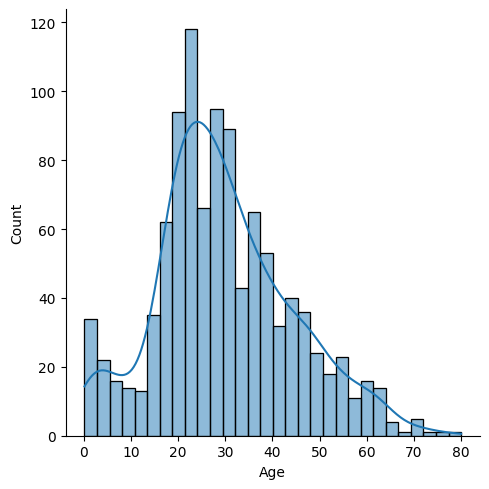

In [16]:
sns.displot(df['Age'],bins=30,kde=True)

In [17]:
df['Age'].skew()

np.float64(0.40767455974362266)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
num_df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [20]:
num_df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [21]:
num_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [22]:
num_df['Fare'] = np.log1p(num_df['Fare'])

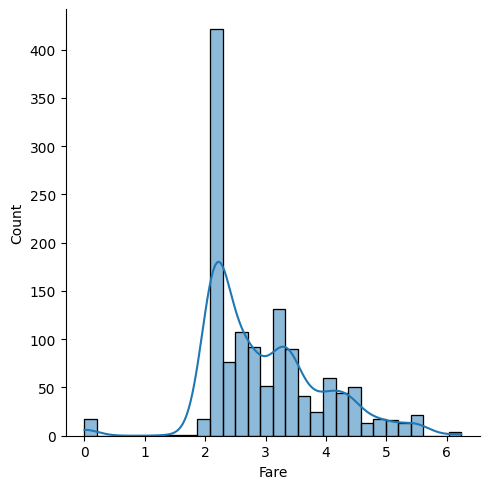

In [23]:
sns.displot(num_df['Fare'],bins=30,kde=True)

In [24]:
num_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,2.110213
1,1,1,38.0,1,0,4.280593
2,1,3,26.0,0,0,2.188856
3,1,1,35.0,1,0,3.990834
4,0,3,35.0,0,0,2.202765


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
ew = num_df['Survived']

In [28]:
ew.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
num_df.drop('Survived',axis=1,inplace=True)

In [30]:
scaled_num = pd.DataFrame(scaler.fit_transform(num_df),columns=num_df.columns)

In [31]:
scaled_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,0.841916,-0.611972,0.481288,-0.445,-0.898323
1,-1.546098,0.630431,0.481288,-0.445,1.343689
2,0.841916,-0.301371,-0.479087,-0.445,-0.817085
3,-1.546098,0.397481,0.481288,-0.445,1.044367
4,0.841916,0.397481,-0.479087,-0.445,-0.802717


In [32]:
ew = pd.DataFrame(ew)

In [33]:
scaled_X = scaled_num.reset_index(drop=True)
y = ew['Survived'].reset_index(drop=True)

# Now concatenate
scaled_yay = pd.concat([scaled_X, y], axis=1)

In [34]:
scaled_yay.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,0.841916,-0.611972,0.481288,-0.445,-0.898323,0
1,-1.546098,0.630431,0.481288,-0.445,1.343689,1
2,0.841916,-0.301371,-0.479087,-0.445,-0.817085,1
3,-1.546098,0.397481,0.481288,-0.445,1.044367,1
4,0.841916,0.397481,-0.479087,-0.445,-0.802717,0


In [40]:
obj_df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [36]:
obj_df.drop('Name',axis=1,inplace=True)

In [37]:
obj_df.drop('Cabin',axis=1,inplace=True)

In [39]:
obj_df.drop('Ticket',axis=1,inplace=True)

In [43]:
obj_df.isna().sum()

Sex         0
Embarked    0
dtype: int64

In [42]:
obj_df['Embarked'].fillna(obj_df['Embarked'].mode()[0],inplace=True)

In [44]:
obj_df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [45]:
sex_dummy = pd.get_dummies(obj_df['Sex'])

In [104]:
sex_dummy = sex_dummy.reset_index(drop=True)

In [99]:
df['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [46]:
embarked_dummy = pd.get_dummies(obj_df['Embarked'])

In [105]:
embarked_dummy = embarked_dummy.reset_index(drop=True)

In [116]:
obj_df.drop(['female','male','C','Q','S'],axis=1,inplace=True)

In [109]:
obj_df.drop('Ticket',axis=1,inplace=True)

In [111]:
obj_df = obj_df.reset_index(drop=True)

In [110]:
obj_df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [ ]:
obj_df = pd.concat([obj_df,sex_dummy,embarked_dummy])

In [117]:
obj_df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [47]:
obj_df

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [49]:
embarked_dummy

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
413,False,False,True
414,True,False,False
415,False,False,True
416,False,False,True


In [53]:
b = pd.concat([obj_df,sex_dummy,embarked_dummy],axis=1)

In [55]:
b.drop(['Sex','Embarked'],axis=1,inplace=True)

In [56]:
b

,female,male,C,Q,S
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,False,False,True
4,False,True,False,False,True
...,...,...,...,...,...
413,False,True,False,False,True
414,True,False,True,False,False
415,False,True,False,False,True
416,False,True,False,False,True


In [58]:
scaled_yay

,Pclass,Age,SibSp,Parch,Fare,Survived
0,0.841916,-0.611972,0.481288,-0.445000,-0.898323,0
1,-1.546098,0.630431,0.481288,-0.445000,1.343689,1
2,0.841916,-0.301371,-0.479087,-0.445000,-0.817085,1
3,-1.546098,0.397481,0.481288,-0.445000,1.044367,1
4,0.841916,0.397481,-0.479087,-0.445000,-0.802717,0
...,...,...,...,...,...,...
1304,0.841916,0.000000,-0.479087,-0.445000,-0.802717,0
1305,-1.546098,0.708081,-0.479087,-0.445000,1.776495,0
1306,0.841916,0.669256,-0.479087,-0.445000,-0.898323,0
1307,0.841916,0.000000,-0.479087,-0.445000,-0.802717,0


In [60]:
final_df = pd.concat([scaled_yay,b])

In [61]:
final_df

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S
0,0.841916,-0.611972,0.481288,-0.445,-0.898323,0.0,NaN,NaN,NaN,NaN,NaN
1,-1.546098,0.630431,0.481288,-0.445,1.343689,1.0,NaN,NaN,NaN,NaN,NaN
2,0.841916,-0.301371,-0.479087,-0.445,-0.817085,1.0,NaN,NaN,NaN,NaN,NaN
3,-1.546098,0.397481,0.481288,-0.445,1.044367,1.0,NaN,NaN,NaN,NaN,NaN
4,0.841916,0.397481,-0.479087,-0.445,-0.802717,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,True
414,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,False,False
415,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,True
416,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,True


In [62]:
final_a = scaled_yay.reset_index(drop=True)
final_b = b.reset_index(drop=True)

In [63]:
final = pd.concat([final_a,final_b],axis=1)

In [64]:
final

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S
0,0.841916,-0.611972,0.481288,-0.445000,-0.898323,0,False,True,False,False,True
1,-1.546098,0.630431,0.481288,-0.445000,1.343689,1,True,False,True,False,False
2,0.841916,-0.301371,-0.479087,-0.445000,-0.817085,1,True,False,False,False,True
3,-1.546098,0.397481,0.481288,-0.445000,1.044367,1,True,False,False,False,True
4,0.841916,0.397481,-0.479087,-0.445000,-0.802717,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.841916,0.000000,-0.479087,-0.445000,-0.802717,0,False,True,False,False,True
1305,-1.546098,0.708081,-0.479087,-0.445000,1.776495,0,True,False,True,False,False
1306,0.841916,0.669256,-0.479087,-0.445000,-0.898323,0,False,True,False,False,True
1307,0.841916,0.000000,-0.479087,-0.445000,-0.802717,0,False,True,False,False,True


In [67]:
final = final[0:len(raw_training_data)]

In [91]:
final.corr()['Survived'].sort_values(ascending=False)

Survived           1.000000
female             0.543351
Fare               0.329862
Cost_per_person    0.183227
C                  0.168240
Parch              0.081629
Familysize         0.023058
Q                  0.003650
SibSp             -0.035322
Age               -0.070323
S                 -0.149683
Pclass            -0.338481
male              -0.543351
Name: Survived, dtype: float64

In [74]:
final.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,female,male,C,Q,S,Familysize,Cost_per_person
0,0.841916,-0.611972,0.481288,-0.445,-0.898323,0,False,True,False,False,True,0.036288,-24.755203
1,-1.546098,0.630431,0.481288,-0.445,1.343689,1,True,False,True,False,False,0.036288,37.028193
2,0.841916,-0.301371,-0.479087,-0.445,-0.817085,1,True,False,False,False,True,-0.924086,0.884208
3,-1.546098,0.397481,0.481288,-0.445,1.044367,1,True,False,False,False,True,0.036288,28.779734
4,0.841916,0.397481,-0.479087,-0.445,-0.802717,0,False,True,False,False,True,-0.924086,0.868661


In [70]:
final['Familysize'] = final['Parch'] + final['SibSp']

In [73]:
final['Cost_per_person'] = final['Fare']/final['Familysize']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = final.drop('Survived',axis=1)
y = final['Survived']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression()

In [81]:
from sklearn.metrics import accuracy_score

In [80]:
model.fit(X_train,y_train)

LogisticRegression()

In [82]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.776536312849162

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [85]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = XGBClassifier()
model5 = LGBMClassifier()

In [86]:
model5.fit(X_train,y_train)
pred5 = model5.predict(X_test)
accuracy_score(y_test,pred5)

0.8268156424581006

In [87]:
model4.fit(X_train,y_train)
pred4 = model4.predict(X_test)
accuracy_score(y_test,pred4)


0.8100558659217877

In [88]:
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)
accuracy_score(y_test,pred3)

0.7877094972067039

In [89]:
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)
accuracy_score(y_test,pred2)

0.8044692737430168